In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn

In [2]:
!cp -r /kaggle/input/imageclassificationsport/ /kaggle/working

In [3]:
import tarfile
my_tar = tarfile.open('/kaggle/working/imageclassificationsport/data-z3.tar.xz')
my_tar.extractall('/kaggle/working/imageclassificationsport/data/') # specify which folder to extract to
my_tar.close()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import glob
import os


Analyzujete početnosti v triedach, zobrazte si reprezentanta z triedy

In [6]:
class_name = {}

for filepath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    filename = basename(filepath)
    count = 0
    for path in os.listdir(filepath):
        # check if current path is a file
        if os.path.isfile(os.path.join(filepath, path)):
            count += 1
    class_name[filename] = [count]


In [7]:
class_names = list(class_name.keys())

In [8]:
import pandas as pd
count_df = pd.DataFrame(class_name).transpose()

In [9]:
count_df.columns = ['amount']

count_df.head()

,amount
sidecar racing,135
parallel bar,133
balance beam,152
javelin,136
rings,167


In [10]:
import plotly.express as px

fig = px.bar(count_df, x="amount",title="Amount of classes",template="plotly_dark", height=500)
fig.show()

Analyzujte triedy podľa farebnosti pixelov obrázkov

In [11]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [12]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [13]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [14]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (1, 1))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#5b5655', '#dacecf', '#a78d8e', '#271e24', '#9e2434']


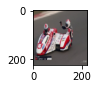

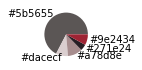

In [15]:
from matplotlib.pyplot import figure
plt.figure(figsize=(1,1))

for dirpath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    count = 0
    for imagepath in glob.iglob(dirpath+'/*'):
        filename = basename(imagepath)
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        modified_image = prep_image(image)
        color_analysis(modified_image)
        break
    break  
            

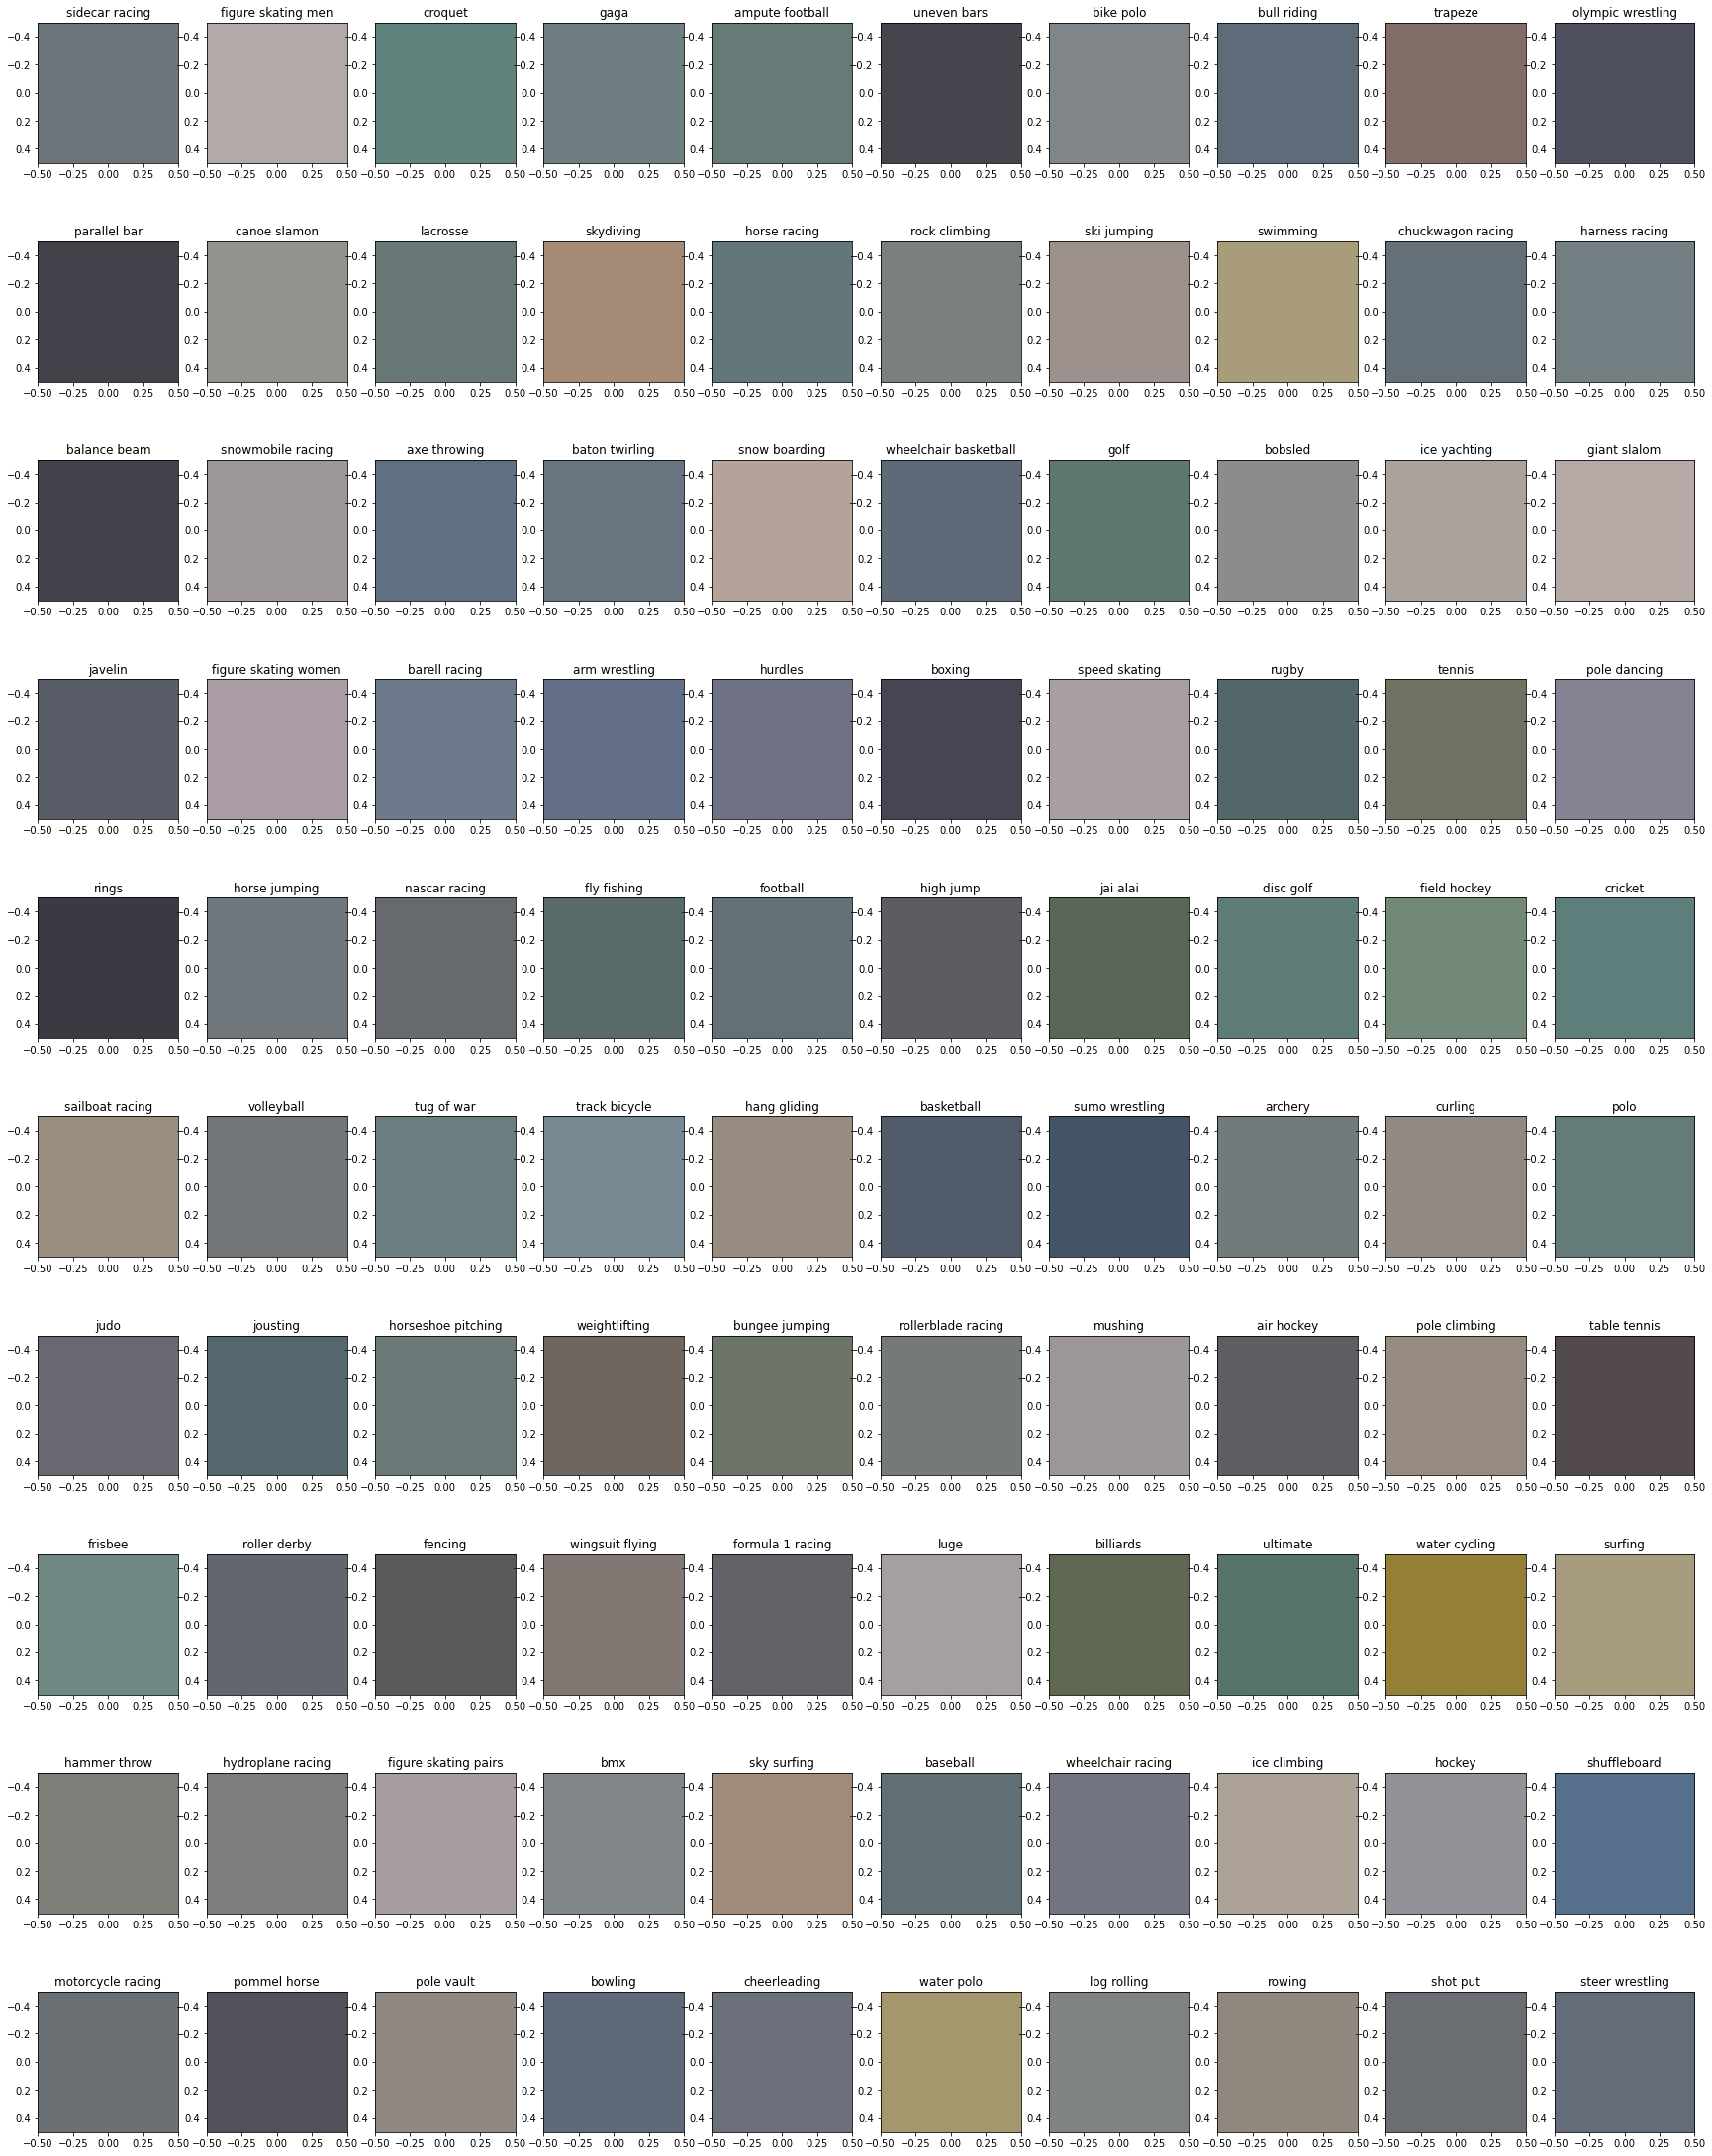

<Figure size 720x720 with 0 Axes>

In [16]:
import cv2
import numpy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure, axis = plt.subplots(nrows=10, ncols=10, figsize=(30,40))
j = 0
plt.figure(figsize = (10, 10))
for (i,dirpath) in enumerate(glob.iglob('/kaggle/working/imageclassificationsport/data/train/*')):
    filename = basename(dirpath)
    colors = []
    for imagepath in glob.iglob(dirpath+'/*'):
        myimg = cv2.imread(imagepath)
        colors.append(myimg)    
    averageIm = np.mean(colors, axis=0)
    averageColor = averageIm.mean(axis=(0,1))
    averageColor = numpy.round(averageColor,0)
    averageColor = [int(a) for a in averageColor]
    axis[i%10,j].imshow([[averageColor]])
    axis[i%10,j].set_title(filename)
    if ((i+1)%10 == 0):
        j+=1
    

Analyzujte triedy podľa predpovedí z ľubovoľného modelu natrénovaného na
probléme ImageNet

Správne vytvorte trénovaciu, validačnú a testovaciu množinu, pripravte si generátor dát (odporúčame aj augmentovať množinu), nezabudnite dáta normalizovať a vhodne im zmeniť veľkosť

In [17]:
import cv2

isExist = os.path.exists('/kaggle/working/compress/')
if not isExist:
    os.makedirs('/kaggle/working/compress/')
    
for dat in glob.iglob('/kaggle/working/imageclassificationsport/data/*'):
    dataname = basename(dat)
    isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/')
    if not isExist:
        os.makedirs('/kaggle/working/compress/'+dataname+'/')
    #print(dataname)
    for path in glob.iglob(dat+'/*'):
        pathname = basename(path)
        isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        if not isExist:
            os.makedirs('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        #print(pathname)
        for imgpath in glob.iglob(path+'/*'):
            love = imgpath
            imgname = basename(imgpath)
            img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
            scale_percent = 20 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            #plt.imshow(resized)
            cv2.imwrite("/kaggle/working/compress/"+dataname+"/"+pathname+"/"+imgname, resized)

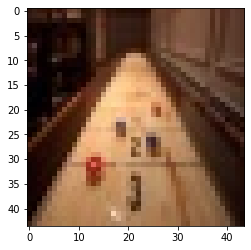

In [18]:
path = '/kaggle/working/compress/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

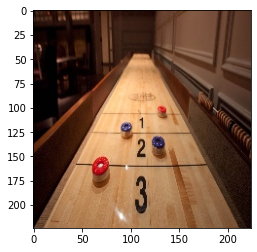

In [19]:
path = '/kaggle/working/imageclassificationsport/data/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
import PIL
from PIL import Image

img = PIL.Image.open("/kaggle/working/compress/test/shuffleboard/5.jpg")
wid, hgt = img.size
print(wid,hgt)

44 44


In [21]:
for dat in glob.iglob('/kaggle/working/compress/test/*'):
    dataname = basename(dat)
    print(dataname)

sidecar racing
parallel bar
balance beam
javelin
rings
sailboat racing
judo
frisbee
hammer throw
motorcycle racing
figure skating men
canoe slamon
snowmobile racing
figure skating women
horse jumping
volleyball
jousting
roller derby
hydroplane racing
pommel horse
croquet
lacrosse
axe throwing
barell racing
nascar racing
tug of war
horseshoe pitching
fencing
figure skating pairs
pole vault
gaga
skydiving
baton twirling
arm wrestling
fly fishing
track bicycle
weightlifting
wingsuit flying
bmx
bowling
ampute football
horse racing
snow boarding
hurdles
football
hang gliding
bungee jumping
formula 1 racing
sky surfing
cheerleading
uneven bars
rock climbing
wheelchair basketball
boxing
high jump
basketball
rollerblade racing
luge
baseball
water polo
bike polo
ski jumping
golf
speed skating
jai alai
sumo wrestling
mushing
billiards
wheelchair racing
log rolling
bull riding
swimming
bobsled
rugby
disc golf
archery
air hockey
ultimate
ice climbing
rowing
trapeze
chuckwagon racing
ice yachting
t

In [22]:
image_size = (wid, hgt)
batch_size = 64

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/valid",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)

Found 13572 files belonging to 100 classes.


2022-12-05 13:17:43.547424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 13:17:43.551824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 13:17:43.552582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 13:17:43.554745: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


Zobrazte si reprezentanta z triedy

2022-12-05 13:17:46.675327: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


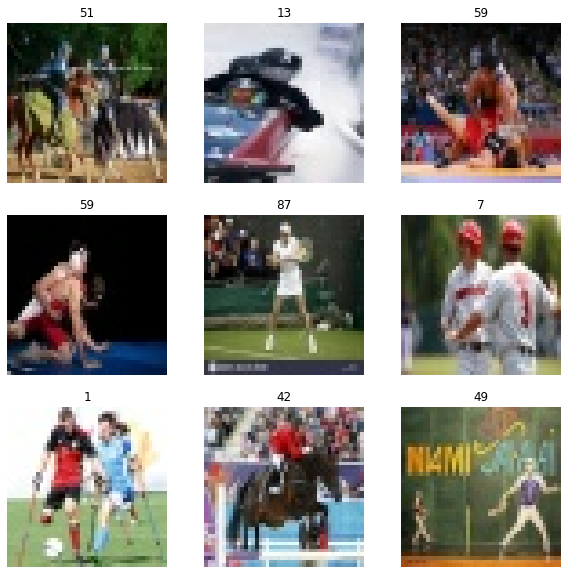

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

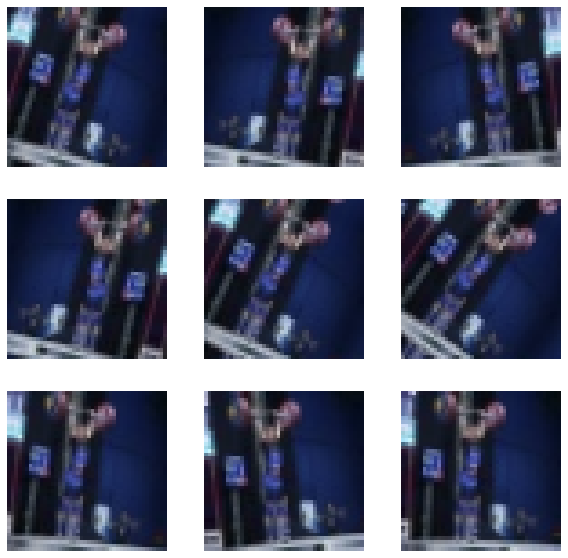

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Navrhnite sieť s aspoň 2 konvolučnými vrstvami. Ak budete sledovať pretrenovanie,
riešte ho regularizáciou. Skúste niekoľko (cielených) konfigurácii hyperparametrov, výsledky zobrazte v tabuľke. Dopracujte sa aspoň ku viditeľnej diagonálena konfúznej matici.

In [ ]:
flags.DEFINE_integer(
    "num_session_groups",
    30,
    "The approximate number of session groups to create.",
)
flags.DEFINE_string(
    "logdir",
    "/kaggle/working/logs",
    "The directory to write the summary information to.",
)
flags.DEFINE_integer(
    "summary_freq",
    600,
    "Summaries will be written every n steps, where n is the value of "
    "this flag.",
)
flags.DEFINE_integer(
    "num_epochs",
    5,
    "Number of epochs per trial.",
)

In [27]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([256,512]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete[0.2,0.5])
#HP_LEARNING_RATE = hp.HParam('optimizer', hp.Discrete([1e-3,1e-2]))
HP_OPTIMIZER = hp.HParam("optimizer", hp.Discrete(["adam", "adagrad"]))

METRIC_ACCURACY = 'accuracy'

hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER]
metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')]

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

TypeError: 'ABCMeta' object is not subscriptable

In [54]:
hparams

TypeError: 'module' object is not subscriptable

In [39]:
from tensorflow.keras.utils import plot_model

def make_model(hparams, input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(hparams[HP_DROPOUT])(x)
    x = layers.Dense(hparams[HP_NUM_UNITS], activation=activation)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    
    model = keras.Model(inputs, outputs)
    

    model.compile(
    optimizer=hparams[HP_OPTIMIZER],
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    )
    #valid_pred_raw = model.predict(val_ds)
    #valid_pred = np.argmax(valid_pred_raw, axis=1)
    #valid_labels = [labels for _, labels in val_ds.unbatch()]
    #_, accuracy = model.evaluate(val_ds, valid_labels)
    return model


#model = make_model(hparams,input_shape=image_size + (3,), num_classes=100)
#keras.utils.plot_model(model, show_shapes=True)
#plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'hparams' is not defined

In [ ]:
def run(base_logdir, session_id, hparams):
    """Run a training/validation session.
    Flags must have been parsed for this function to behave.
    Args:
      data: The data as loaded by `prepare_data()`.
      base_logdir: The top-level logdir to which to write summary data.
      session_id: A unique string ID for this session.
      hparams: A dict mapping hyperparameters in `HPARAMS` to values.
    """
    model = model_fn(hparams=hparams, seed=session_id)
    logdir = os.path.join(base_logdir, session_id)
    
    epochs = 5

    #callback = tf.keras.callbacks.TensorBoard(logdir,update_freq=flags.FLAGS.summary_freq,profile_batch=0,  # workaround for issue #2084)
    
    #hparams_callback = hp.KerasCallback(logdir, hparams)
    callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1),
    #keras.callbacks.ModelCheckpoint("best_model{epoch}.keras", monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
    tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=5,update_freq=flags.FLAGS.summary_freq,profile_batch=0),
    cm_callback,
    hp.KerasCallback(logdir, hparams)]

    result = model.fit(
    train_ds,
    epochs=flags.FLAGS.num_epochs,
    shuffle=False,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
    #use_multiprocessing=True
    )

In [ ]:
def run_all(logdir, verbose=False):
    """Perform random search over the hyperparameter space.
    Arguments:
      logdir: The top-level directory into which to write data. This
        directory should be empty or nonexistent.
      verbose: If true, print out each run's name as it begins.
    """
    rng = random.Random(0)

    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams_config(hparams=HPARAMS, metrics=METRICS)

    sessions_per_group = 2
    num_sessions = flags.FLAGS.num_session_groups * sessions_per_group
    session_index = 0  # across all session groups
    for group_index in range(flags.FLAGS.num_session_groups):
        hparams = {h: h.domain.sample_uniform(rng) for h in HPARAMS}
        hparams_string = str(hparams)
        for repeat_index in range(sessions_per_group):
            session_id = str(session_index)
            session_index += 1
            if verbose:
                print(
                    "--- Running training session %d/%d"
                    % (session_index, num_sessions)
                )
                print(hparams_string)
                print("--- repeat #: %d" % (repeat_index + 1))
            run(
                base_logdir=logdir,
                session_id=session_id,
                hparams=hparams,
            )

In [ ]:
def main():
    np.random.seed(0)
    logdir = flags.FLAGS.logdir
    shutil.rmtree(logdir, ignore_errors=True)
    print("Saving output to %s." % logdir)
    run_all(logdir=logdir, verbose=True)
    print("Done. Output saved to %s." % logdir)

In [ ]:
main()

In [29]:
#import shutil
#shutil.rmtree('/kaggle/working/logs/')

In [30]:
rm -rf /kaggle/working/logs/

In [31]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(30, 30))
  plt.imshow(cm, interpolation='nearest', cmap='magma')
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names,rotation=90)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    #plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [32]:
from datetime import datetime

# Clear out prior logging data.
#!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

2022-12-05 13:02:54.038018: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 13:02:54.038070: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-05 13:02:54.039715: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-12-05 13:02:54.407494: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 13:02:54.407711: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [33]:
def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

In [34]:
import itertools
import io

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(val_ds)
  test_pred = np.argmax(test_pred_raw, axis=1)
  test_labels = [labels for _, labels in val_ds.unbatch()]
  #test_labels = np.concatenate([y for x, y in val_ds], axis=0)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

2022-12-05 13:03:16.875082: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 13:03:16.875135: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-05 13:03:17.107419: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 13:03:17.107591: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


NameError: name 'hparams' is not defined

In [37]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
import tensorflow as tf

%load_ext tensorboard

In [ ]:
import os

# folder path
dir_path = '/kaggle/working/logs/'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    print(path)

In [ ]:
#tensorboard --logdir /kaggle/working/logs/train --bind_all

In [ ]:
!zip -r file.zip /kaggle/working/logs

In [ ]:
from IPython.display import FileLink
FileLink(r'file.zip')

In [ ]:
 import plotly.express as px
    
predicted_classes = np.array([])
true_classes =  np.array([])
    
test_pred_raw = model.predict(test_ds)
test_pred = np.argmax(test_pred_raw, axis=1)
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
#test_labels = [labels for _, labels in test_ds.unbatch()]

# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.


fig = px.imshow(cm,width=600, height=600,x=class_names,y=class_names)
fig.show()